In [1]:
import sys
sys.path.append('../')
sys.path.append('../utils/')
import schema
import datajoint_utils as dju
import database_pop as pop
import numpy as np

import importlib

[2025-06-24 19:15:17,414][INFO]: Connecting root@127.0.0.1:3306
[2025-06-24 19:15:17,515][INFO]: Connected root@127.0.0.1:3306


/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/utils/config.ini


In [2]:
importlib.reload(pop)
# pop.reload_celltypefiles()

<module 'database_pop' from '/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/nbs/../utils/database_pop.py'>

In [47]:
importlib.reload(dju)
protocol_names = dju.search_protocol('dots')
df = dju.get_datasets_from_protocol_names(protocol_names)
df.tail()

Found 1 protocols matching "dots":
['manookinlab.protocols.ObjectMotionDots']
Found 60 experiments, 107 epoch blocks.


,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
102,20250128C,data011,0.0,oms,manookinlab.protocols.ObjectMotionDots,1,20250128C/data011,OMS dots,116,13,2127,3225,396
103,20250131C,data005,0.0,motion,manookinlab.protocols.ObjectMotionDots,1,20250131C/data005,OMS dots,117,13,2133,3233,402
104,20250131C,data018,0.0,motion2,manookinlab.protocols.ObjectMotionDots,1,20250131C/data018,OMS dots,117,13,2142,3243,405
105,20250307C,data030,0.0,oms_dots,manookinlab.protocols.ObjectMotionDots,1,20250307C/data030,OMS Dots,124,13,2258,3401,456
106,20250307C,data031,0.0,oms_dots,manookinlab.protocols.ObjectMotionDots,1,20250307C/data031,OMS Dots,124,13,2258,3402,456


In [65]:
import stim
importlib.reload(stim)
importlib.reload(dju)
idx = 99
ls_const = ['exp_name', 'datafile_name']
s1 = stim.Stim(**df.loc[idx,ls_const].to_dict())
s1

Stim with properties:
  exp_name: 20241121H
  datafile_name: data010
  chunk_name: motion2
  protocol_name: manookinlab.protocols.ObjectMotionDots
  noise_protocol_name: manookinlab.protocols.SpatialNoise

In [66]:
importlib.reload(dju)
df_typing = dju.get_typing_files_for_protocol(s1.exp_name, s1.datafile_name, s1.noise_protocol_name, True)
df_typing

Found 3 noise chunks for protocol "manookinlab.protocols.SpatialNoise"
Noise chunks sorted by distance:
  chunk2: 225.08 minutes
  chunk3: 25.07 minutes
  chunk1: 135.37 minutes
Found 4 cell typing file(s) for chunk2
Found 4 cell typing file(s) for chunk2
Found 4 cell typing file(s) for chunk2


,exp_name,datafile_name,datafile_names,chunk_name,protocol_name,ss_version,typing_file_name,typing_file_path,typing_file_id
0,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,457
1,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification-FMR.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,458
2,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,459
3,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification-FMR.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,460


In [72]:
df_sct = (schema.SortedCellType() & f'file_id=457').fetch(format='frame')
df_sct[df_sct['cell_type'].str.lower().str.contains('offp')]

,sorted_cell_id,file_id,cell_type
id,,,
307535,525295,457,All/OffP/
307536,525313,457,All/OffP/
307537,525331,457,All/OffP/
307538,525358,457,All/OffP/
307539,525369,457,All/OffP/
307540,525388,457,All/OffP/
307541,525406,457,All/OffP/
307542,525431,457,All/OffP/
307543,525445,457,All/OffP/


In [73]:
schema.SortedCell()

id,chunk_id,algorithm should be directory name,cluster_id
1,1,kilosort2,1
2,1,kilosort2,2
3,1,kilosort2,3
4,1,kilosort2,4
5,1,kilosort2,5
6,1,kilosort2,6
7,1,kilosort2,7
8,1,kilosort2,8
9,1,kilosort2,9
10,1,kilosort2,10


In [68]:
df_sct['cell_type'].unique()

array(['All/Amacrine/A1/', 'All/Amacrine/', 'All/'], dtype=object)

In [8]:
importlib.reload(stim)
ls_const = ['exp_name', 'datafile_name', 'ss_version']
idx = 0
n1 = stim.NoiseStim(**df_typing.loc[idx,ls_const].to_dict())
n1

NoiseStim with properties:
  exp_name: 20230614C
  datafile_name: data012
  chunk_name: chunk2
  protocol_name: manookinlab.protocols.FastNoise
  noise_protocol_name: manookinlab.protocols.FastNoise
  ss_version: kilosort2
  staXChecks: 100
  staYChecks: 75
  numXChecks: 100
  numYChecks: 75
  microns_per_pixel: 3.8
  canvas_size: [800, 600]
  data_files: ['data012']

In [28]:
import response
importlib.reload(response)
from utils import vision_utils as vu
importlib.reload(vu)
r1 = response.NoiseResponse(n1)

Loading VCD from /Volumes/data-1/analysis/20230614C/chunk2/kilosort2 for kilosort2...


In [29]:
r1.vcd.main_datatable[1].keys()

dict_keys(['ID', 'classID', 'x0', 'y0', 'SigmaX', 'SigmaY', 'Theta', 'gAmp', 'contourX', 'contourY', 'contourArea', 'simpleContourX', 'simpleContourY', 'simpleContourArea', 'RedTimeCourse', 'GreenTimeCourse', 'BlueTimeCourse', 't1', 't2', 't3', 'a1', 'a2', 'a3', 'n1', 'n2', 'n3', 'tOffset', 'dot', 'dot2', 'srm', 'rl', 'amp1', 'amp2', 'amp3', 'blueness', 'RedVTimeCourse', 'GreenVTimeCourse', 'BlueVTimeCourse', 't1V', 't2V', 't3V', 'a1V', 'a2V', 'a3V', 'n1V', 'n2V', 'n3V', 'tVOffset', 'dotV', 'dot2V', 'srmV', 'rlV', 'amp1V', 'amp2V', 'amp3V', 'bluenessV', 'Auto', 'isiBinning', 'nSpikes', 'isiMean', 'isiRMS'])

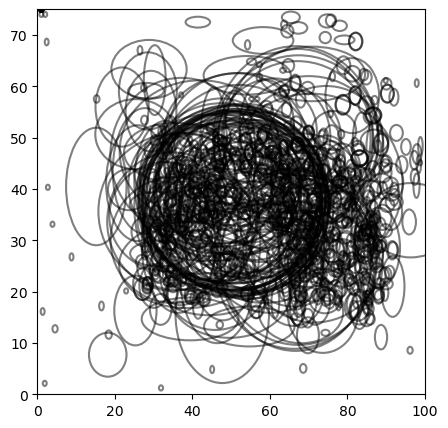

In [31]:
r1.plot_rf_ells()

In [ ]:
importlib.reload(dju)
protocol_names = dju.search_protocol('spatialnoise')
df = dju.get_datasets_from_protocol_names(protocol_names)
df.head()

Found 4 protocols matching "spatialnoise":
['manookinlab.protocols.DisplacedSpatialNoise'
 'manookinlab.protocols.FlashedSpatialNoise'
 'manookinlab.protocols.SpatialNoise'
 'manookinlab.protocols.SpatialNoiseAndMotion']
No epochs found for block 2372
Found 48 experiments, 192 epoch blocks.


,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
0,20231003C,data003,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20231003C/data003,noise,68,3,1499,2285,208
1,20231003C,data004,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20231003C/data004,noise,68,3,1499,2286,208
2,20231003C,data005,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20231003C/data005,noise,68,3,1499,2287,208
3,20231003C,data017,0.5,chunk3,manookinlab.protocols.SpatialNoise,1,20231003C/data017,spatial noise,68,3,1506,2296,206
4,20231003C,data027,0.5,chunk4,manookinlab.protocols.SpatialNoise,1,20231003C/data027,spatial noise,68,3,1516,2306,207


In [44]:
df[df['group_label'].str.contains('big')]

,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
20,20231220C,data007,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20231220C/data007,big noise,73,3,1580,2380,228
25,20240117C,data009,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20240117C/data009,big noise,74,3,1607,2410,234
32,20240130C,data025,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20240130C/data025,big noise,75,3,1651,2456,240
33,20240130C,data026,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20240130C/data026,big noise,75,3,1651,2457,240
146,20250219H,data018,0.0,chunk3,manookinlab.protocols.SpatialNoise,1,20250219H/data018,big noise,120,3,2187,3301,426
147,20250219H,data019,0.0,chunk3,manookinlab.protocols.SpatialNoise,1,20250219H/data019,big noise,120,3,2187,3302,426
164,20250306C,data005,0.0,big_noise,manookinlab.protocols.SpatialNoise,1,20250306C/data005,big noise,127,3,2296,3487,477
